### 2 Cross-Validation

Before creating any Machine Learning model, it is necessary to understand what is cross-validation and how to choose the best
set of parameter depending on the dataset

* Cross-validation is a step in the process of building machine learning models which help to ensure that the model created fits the
data accurately and also avoids overfitting.


In [5]:
import pandas as pd

df = pd.read_csv("../data/winequality-red.csv", sep=";")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


* The problem can be treated as a classification problem or regression, since wine quality is nothing but a real number between 0 and 10.
* classification will be chosen due to simplicity
* This dataset, consists only of six types of quality values.


In [6]:
# Creating a mapping dictionary, for the wine qualities from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# By using the function map on a dictionary makes possible to convert values in a column to the values in the dictionary.
df.loc[:, "quality"] = df['quality'].map(quality_mapping)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


As is a classification problem, we can apply neural networks. But it would be a stretch as will overcomplicate the problem.

* A simpler approach can be **decision trees**
* It is necessary to understand what overfitting is. For that the data needs to be split

In [7]:
# use the sample with frac 1 to shuffle the dataframe.
# Reset the indices since they will change after.
# Shuffling the dataframe.
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 rows
df_train = df.head(1000)

# Bottom 599 values are selected for testing/validation
df_test = df.tail(599)

1. Importing a decision tree model from Scikit-learn to train the model in the training set

In [9]:
# Import from scikit-learn
from sklearn import tree
from sklearn import metrics

# Initialize decision tree classifier with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)

# Chose the columns to be used in the training, these will be used as features in the model.
cols = ["fixed acidity", "volatile acidity", "citric acid", 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Train the model on the provided features and mapped quality from before
clf.fit(df_train[cols], df_train['quality'])

DecisionTreeClassifier(max_depth=3)

2. Testing the accuracy

In [11]:
#generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set.
test_predictions = clf.predict(df_test[cols])

# Calculate the accuracy of predictions on the training dataset.
train_accuracy = metrics.accuracy_score(df_train['quality'], train_predictions)

# Calculate the accuracy of predictions on the test dataset
test_accuracy = metrics.accuracy_score(df_test['quality'], test_predictions)

In [15]:
train_accuracy * 100

59.9

In [14]:
test_accuracy * 100

52.25375626043406

#### Understanding the results

* The training and test accuracies found around the 50% can be increased when the depth is increased to a higher number (i.e., max_depth = 7 --> 76% on the trainin set)
* Accuracy is the most straightforward metric, however, it might be not the most the best for this problem.

Lets calculate accuracies for different depth values

In [16]:
# Import Matplotlib
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# This is the global size of label text on the plots
matplotlib.rc('xtick', labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

# This is the line that ensures that the plot is displayed inside the notebook.
%matplotlib inline

In [19]:
# Initialize lists to store accuracies for training and test data, starting from 50% accuracy.
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    # Init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # Columns/features for training
    cols = cols

    # Fit the model on given features
    clf.fit(df_train[cols], df_train['quality'])

    # Create training and test set predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    #Calculate training & test set accuracies.
    train_accuracy = metrics.accuracy_score(df_train['quality'], train_predictions)
    test_accuracy = metrics.accuracy_score(df_test['quality'], test_predictions)

    # Append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

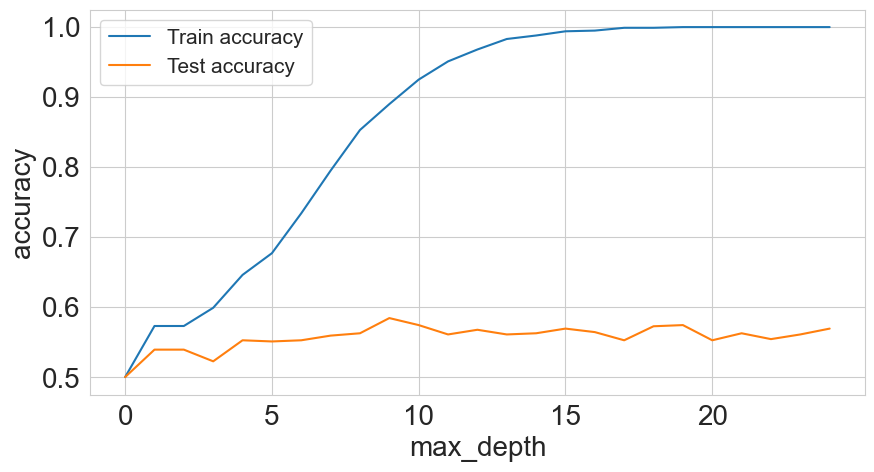

In [21]:
## Create two plots using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label="Train accuracy")
plt.plot(test_accuracies, label="Test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,25, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

#### Explanation
The est score for the train data is obtained when max depth has a values of 14. from there onwards, the accuracy remains the same.

* This means that the simple decision tree calculated keeps learning about the training data better and better with an increase in Max_Depth, but the
performance on test data doesn't improve at all

### Overfitting:
The model fits perfectly on the training data, but will not generalize on unseen samples.

* The wine dataset, even though the model performs well on training data is not useful as the performance on real-world data is not good.

* Another definition for overfitting would be when the increase on the test loss as the training loss keeps decreasing --> Common for Neural Networks.

* **occam's razor** in simple words states that things should not be overcomplicated. If the model doesn't follow this principle then it is probably overfitting

### CrossValidation
There are different ways of doing crossvalidation. However, the most important step when comes to building a good ML model is how generalizable
is to unseen data.

Also choosing the right crossvalidation depends on the dataset. One kind of crossvalidation can be applicable to one dataset but not to others.

Here the techniques most popular and widely used:
* K-fold CrossValidation
* Stratified k-fold cross-validation
* hold-out based validation
* leave-one-out crossValidation
* Group k-fold crossValidation


In [33]:
from sklearn import model_selection

# Training data
df = pd.read_csv("../data/winequality-red.csv", sep=';')
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# By using the function map on a dictionary makes possible to convert values in a column to the values in the dictionary.
df.loc[:, "quality"] = df['quality'].map(quality_mapping)

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [34]:
if __name__ == "__main__":
    # Step 2: randomize the data.
    df = df.sample(frac=1).reset_index(drop=True)

    # Step 3: Initialize the k-fold class from model_selection module
    kf = model_selection.KFold(n_splits=5)

    # Step 4: Fill the new created Kfold column
    for fold, (tran_, val_) in enumerate(kf.split(X = df)):
        df.loc[val_, 'kfold'] = fold

    # Step 5: Save the new csv with the kfold column
    df.to_csv("../data/output/wineQuality_kfolds.csv", index=False)

### Stratified k-fold
It is easy to modify the code above to create a stratified k-fold by only modifying the  model selected. And also
the kf.split(..) function.

In [37]:
from sklearn import model_selection

if __name__ == "__main__":
    # Training data
    df = pd.read_csv("../data/winequality-red.csv", sep=";")

    quality_mapping = {
        3: 0,
        4: 1,
        5: 2,
        6: 3,
        7: 4,
        8: 5
    }

    # By using the function map on a dictionary makes possible to convert values in a column to the values in the dictionary.
    df.loc[:, "quality"] = df['quality'].map(quality_mapping)

    # Step 1: Create a new column called kfold and fill with a -1 value
    df['kfold'] = -1

    # Step 2: Randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)

    # Step 3: Fetch the targets.
    y = df['quality'].values

    # Step 4: Initialize the kfold class from model selection module
    kf = model_selection.kf = model_selection.StratifiedKFold(n_splits=5)

    # Step 5: Fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f

    # Step 6: Save the new csv with kfold cols
    df.to_csv("../data/output/wineQuality_stratiofied_kfolds.csv", index=False)

Text(0, 0.5, 'count')

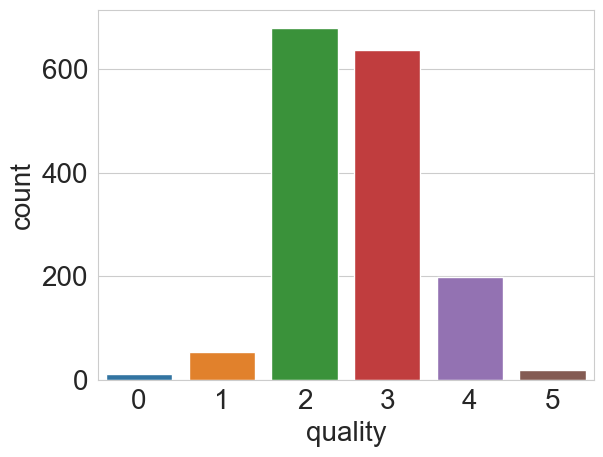

In [38]:
b = sns.countplot(x= "quality", data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

* **Simple rule:** If is a standard classification problem, choose stratified k-fold
*  When dealing with big amounts of data a rule of 80%, 20% it is applied for train, test splits.
* However, depending on the algorithm used, training and validation can be really expensive for a big dataset. In those cases **hold-out based validation** is more suitable

* The process for creating the hold-out remains the same as stratified k-fold. A rule of 90%, 10% can be also applied.
* Hold-out is also used frequently for **time-series data**

### Stratified K-Fold for regression
To do this we need first to divide the target into bins, and then use the stratified k-fold in the same way that for classification problems.

One way to go around when not having enough samples is to use the **Sturge's Rule** to calculate the appropriate number of bins.

***number of bins = 1 + log(N)***


In [45]:
# Stratified-kfold for regression
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # Step 1: Create a new column called kfold and fill with -1
    data["kfold"] = -1

    # Step 2: randomize the rows of data
    data = data.sample(frac=1).reset_index(drop=True)

    #Step 3: Calculate the number of bins by Sturge's rule. By taking the floor of the value or round it
    num_bins = int(np.floor(1 + np.log2(len(data))))

    # Step 4: Bin Target
    data.loc[:, "bins"] = pd.cut(data["target"], bins=num_bins, labels=False)

    # Step 5: Initiate the k-fold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)

    # Step 6: Fill the new kfold column, Note that instead of targets, bins are used.
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data['bins'].values)):
        data.loc[v_, 'kfold'] = f

    # Step 7 Drop the bins column
    data = data.drop("bins", axis=1)

    # Return dataframe with folds
    return data

if __name__ == "__main__":
    # Creating a dataset with 15000 samples and 100 features and 1 target
    X, y = datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

    # Create the dataframe out of numpy arrays
    df = pd.DataFrame(X, columns=[f"f_{i}" for i in range(X.shape[1])])
    df.loc[:, "target"] = y

    # Create the folds
    df = create_folds(df)

In [46]:
df.head(10)

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-0.307657,0.425302,-0.681089,-0.767576,0.936827,-0.657826,0.259980,0.884354,-1.731373,2.281037,...,-0.065998,-0.374348,-0.208358,0.695778,-0.878721,0.938060,2.291708,1.197587,23.604694,0
1,-2.860596,-1.979723,1.617859,0.831847,-0.909084,-0.786511,-0.316027,-0.289020,1.613705,0.225404,...,1.077789,0.743057,-0.111417,-0.345318,0.198477,-0.337461,-0.501266,0.732004,-31.804332,0
2,2.460729,1.326221,-0.040442,0.724673,-1.403314,-1.285753,-0.213107,-0.741132,-0.683439,1.956996,...,0.325942,-1.091533,-0.688315,0.432825,0.389281,0.313042,0.293554,-1.042142,-145.829334,0
3,-0.700046,-0.811302,-1.797300,-1.832255,-0.877515,-1.694635,-0.178841,-0.472952,-2.382419,0.292357,...,0.143965,-1.590390,-0.537044,-0.865114,0.785775,-1.850787,-0.210597,0.436174,67.561536,0
4,-0.455618,-0.388424,2.151813,0.152386,-1.215333,0.712172,1.114234,0.846091,-1.332695,0.030372,...,1.227196,0.625988,-0.274958,-0.753676,-1.500340,0.141247,-0.556303,0.457837,-18.205081,0
5,-0.772573,0.858132,-0.019593,0.614772,-0.103950,0.863459,0.292123,0.486360,0.953429,-0.986066,...,-0.674683,-0.906994,1.454760,-1.061218,0.931177,-1.538371,1.049275,-0.270515,-78.228958,0
6,-0.594591,-0.508084,-0.801134,0.833314,0.865262,0.551455,0.631907,0.226756,1.694842,-0.563663,...,-2.463996,-0.638112,-1.790082,-0.456252,-0.701918,-0.308984,-0.209384,0.230101,187.928236,0
7,0.113377,-1.534042,-1.381490,-0.784309,0.075119,1.479131,0.557635,-0.190263,-1.141584,0.590020,...,1.004798,0.129886,1.809338,0.094052,0.133591,-1.340237,2.280908,0.675855,-378.073059,0
8,2.012042,-0.995225,-0.369380,0.954672,0.059903,-0.057193,0.108742,-0.513833,1.461560,-0.240292,...,-0.232622,0.356524,0.139523,-1.863852,0.695052,0.092461,0.110224,1.721313,183.699231,0
9,2.222296,0.705967,0.401312,1.252110,-1.642920,-0.449773,0.007164,-1.196851,0.323326,2.269503,...,0.850811,-1.163945,1.515093,-1.224566,-0.805751,-0.754867,-1.234429,-0.208084,-30.751135,0
